## Import Library

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

## Q1.Why you want to apply regression on selected dataset?

WaistWeightDataset all about the waist and weight.In this data set there are two column one is waist and another weight.In the data set Waist is in cm and weight in kg. 

In [44]:
df=pd.read_csv('WaistWeightdataset.csv')

In [45]:
df

,Waist_cm,Weight_kg
0,71,51
1,89,66
2,64,45
3,74,57
4,87,64
5,93,75
6,79,61
7,81,62
8,75,55
9,72,53


In [46]:
df.shape

(15, 2)

## Q2.How many total observations in data?

As show above there are total 15 observation is there.

## Q3.How many independent variables?

There are only one independent variable is Waist_cm.

## Q4.Which is dependent variable?

Weight_kg is dependent variable

## Q5.Which are most useful variable in estimation? Prove using correlation.

In this data set only one independent variable.So there is no selection of most useful variable.But following correlation between indepented varible is there.

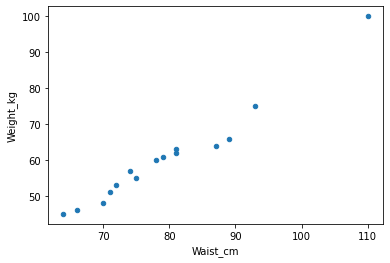

In [47]:
df.plot(kind='scatter',x='Waist_cm',y='Weight_kg')
plt.show()

79.33333333333333 60.4
1.1347070844686649 -29.620095367847405


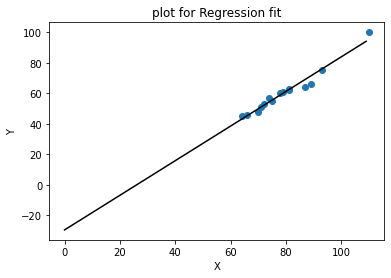

In [48]:
x_bar=df.Waist_cm.sum()/df.Waist_cm.count()
y_bar=df.Weight_kg.sum()/df.Weight_kg.count()
print(x_bar,y_bar)
n=((df.Waist_cm-x_bar)*(df.Weight_kg-y_bar)).sum()
d=((df.Waist_cm-x_bar)**2).sum()
m=n/d
b=y_bar-m*x_bar
print(m,b)
predicted_df=pd.DataFrame(data=range(0,df.Waist_cm.max()),columns={'X'})
predicted_df['Y']=predicted_df.X*m+(b)
x=predicted_df['X']
y=predicted_df['Y']
plt.plot(x,y,c='black')
plt.scatter(df.Waist_cm,df.Weight_kg)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("plot for Regression fit")
plt.show()

## Implementation of LR using Gradient Descent

We will take m=0 and b=0 as initial values which is just horizontal line.

Our task is determine the optimum value of m and c, such that the line corresponding to those values is the best fitting line or gives the minimum error.

Error in current values of m and c is called as loss function. It means that we need to optimize loss function to reduce error in m and b.


m=0

c=0

L=0.00001

epochs=1000

Here m and c is 0 and Leaning rate is 0.00001 and also epochs is 1000.

Code is below.

D_m=(-2/n)*sum(Waist_cm*(Weight_kg-Y_pred))

D_c=(-2/n)*sum(Weight_kg-Y_pred)

m=m-L*D_m

c=c-L*D_c

Here the process repeat untill our loss function is very small or 0.

In [49]:
Waist_cm=df.iloc[:,0]
Weight_kg=df.iloc[:,1]


In [50]:
m=0
c=0
L=0.00001
epochs=2000
n=float(len(Waist_cm))
for i in range(epochs):
    Y_pred=m*Waist_cm+c
    D_m=(-2/n)*sum(Waist_cm*(Weight_kg-Y_pred))
    D_c=(-2/n)*sum(Weight_kg-Y_pred)
    m=m-L*D_m
    c=c-L*D_c
print(m,c)

0.7691069477703256 -0.014565788494759669


## RMSE & R2 score

Root mean square error or root mean square deviation is one of the most commonly used measures for evaluating the quality of predictions. It shows how far predictions fall from measured true values using Euclidean distance.

To compute RMSE, calculate the residual (difference between prediction and truth) for each data point, compute the norm of residual for each data point, compute the mean of residuals and take the square root of that mean. RMSE is commonly used in supervised learning applications, as RMSE uses and needs true measurements at each predicted data point.

In [51]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
Y_pred=m*Waist_cm+c
print("RMSE",sqrt(mean_squared_error(Weight_kg,Y_pred)),r2_score(Weight_kg,Y_pred))
X=pd.DataFrame(df.Waist_cm)
Y=df.Weight_kg
rg=linear_model.LinearRegression()
rg.fit(X,Y)

Y_pred=m*Waist_cm+c
print("RMSE:",sqrt(mean_squared_error(Y,rg.predict(X))) ,"R2 Score:",r2_score(Y,rg.predict(X)))


RMSE 4.929246539784432 0.8607647953279142
RMSE: 2.5484055851335117 R2 Score: 0.9627843958606758


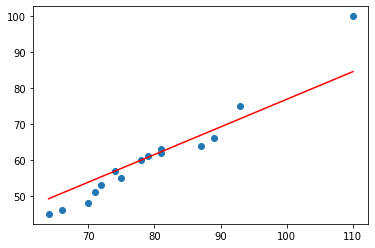

In [52]:
plt.scatter(Waist_cm,Weight_kg)
plt.plot([min(Waist_cm),max(Waist_cm)],[min(Y_pred),max(Y_pred)],color='red')
plt.show()